**Image Enhancement**

In [45]:
import cv2
import numpy as np
import skimage.color
import skimage.io
import skimage.viewer
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity
from scipy import ndimage
import scipy.ndimage as nd
import scipy

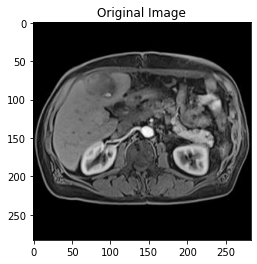

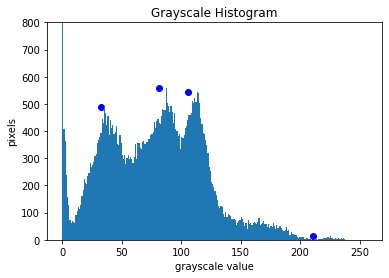

 
 Total no. of modes:  4


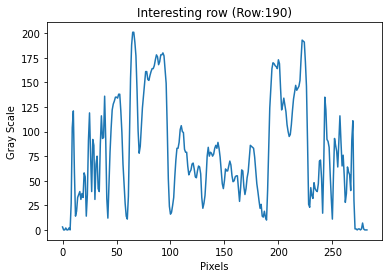

In [46]:

"""
Histogram and KDE
"""

# initialize the image
path='liver.jpg'    # Image Path from the computer
image = cv2.imread(path,cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.title("Original Image")
plt.imshow(image, cmap="gray")
plt.show()


# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.ylim((0,800))

b, bins, patches=plt.hist(image.ravel(),256,[0,256])  # <- or here
data = image
x = np.linspace(np.min(data), np.max(data), num=256)

# find index of minimum between two modes
ind_max = scipy.signal.argrelmax(b[:],order = 18)
x_max = x[ind_max]
y_max = b[ind_max]

plt.scatter(x_max, y_max, color='b')
plt.show()

print(" \n Total no. of modes: ",np.shape(x_max)[0])


# Extracting the interesting row
interest_row1 = image[190,:]
interest_row = interest_row1[np.newaxis,:]
interest_pix = np.array([i for i in range(283)])
plt.figure()
plt.title("Interesting row (Row:190)")
plt.xlabel("Pixels")
plt.ylabel("Gray Scale")

plt.plot(interest_pix,interest_row1)  # <- or here
plt.show()


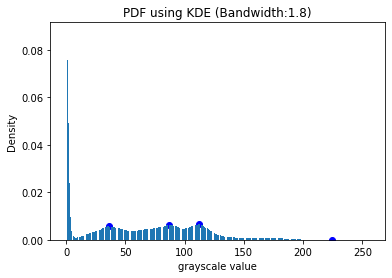

 
 Total no. of modes:  4


In [47]:
## Kernel Distribution Estimation ##

pixels= image.ravel()   # flatten the image
pix = pixels[:, np.newaxis]  # making the array 2D
model = KernelDensity(kernel='gaussian', bandwidth=1.8)  # Applying kernel Gaussian
model.fit(pix)   #Fitting the model to our image

# Extracting the bin values from the histogram
#bins = np.array([i for i in range(0,200)])
#print(bins.shape)
bin = bins[:, np.newaxis]
# # predicting the Pixels for bin values
density = model.score_samples(bin)   
density = np.exp(density)

# Plotting the PDF using KDE

plt.figure()
plt.title("PDF using KDE (Bandwidth:1.8)")
plt.xlabel("grayscale value")
plt.ylabel("Density")
plt.bar(bins, density)  # <- or here

data = density
x = np.linspace(np.min(data), np.max(data), num=256)

# find index of minimum between two modes
ind_max = scipy.signal.argrelmax(density[:],order = 18)
x_max = bin[ind_max]
y_max = density[ind_max]

plt.scatter(x_max, y_max, color='b')

plt.show()

print(" \n Total no. of modes: ",np.shape(x_max)[0])


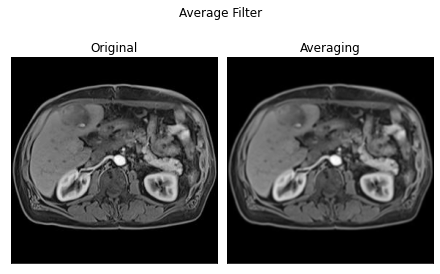

In [48]:
"""
### Averaging Filter ###
"""


kernel = np.ones((3,3),np.float32)/9   # Average Kernel
dst = cv2.filter2D(image,-1,kernel)

# Extraction of row of interest and setting its value to 255
interest_dst = dst[190,:]
interest_dst = interest_dst[np.newaxis,:]


# Comparison of Original Image and the Averaged Image
fig, axs = plt.subplots(1,2, constrained_layout=True)
plt.subplot(121),plt.imshow(image,cmap=plt.get_cmap('gray')),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,cmap=plt.get_cmap('gray')),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
fig.suptitle("Average Filter")
plt.show()

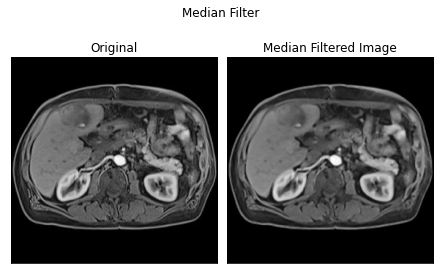

In [49]:
"""
Median Filter
"""
# Defining the median filter of size 3 x 3
median = ndimage.median_filter(image, size=3) 

# Extracting row of interest 
interest_med = median[190,:]
interest_med = interest_med[np.newaxis,:]


# Comparison of Median Filtered Image and Original Image
fig, axs = plt.subplots(1,2, constrained_layout=True)
plt.subplot(121),plt.imshow(image,cmap=plt.get_cmap('gray')),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median,cmap=plt.get_cmap('gray')),plt.title('Median Filtered Image')
plt.xticks([]), plt.yticks([])
fig.suptitle("Median Filter")
plt.show()

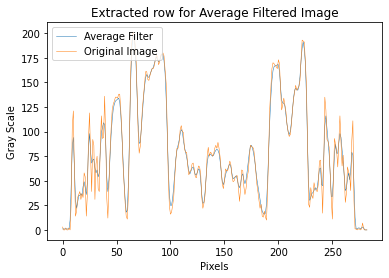

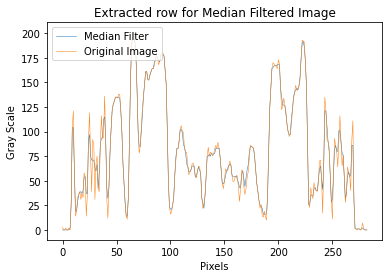

In [50]:
# Comparison of extracted row of Average Filter and Original Image
plt.figure()
plt.plot(interest_pix,interest_dst[0,:],label="Average Filter",linewidth=0.5)
plt.plot(interest_pix,interest_row[0,:],label="Original Image",linewidth=0.5)
plt.legend(loc="upper left")
plt.title("Extracted row for Average Filtered Image")
plt.xlabel("Pixels")
plt.ylabel("Gray Scale")
plt.show()

# Comparison of extracted row of Median Filter and Original Image
plt.figure()
plt.plot(interest_pix,interest_med[0,:],label="Median Filter",linewidth=0.5)
plt.plot(interest_pix,interest_row[0,:],label="Original Image",linewidth=0.5)
plt.legend(loc="upper left")
plt.title("Extracted row for Median Filtered Image")
plt.xlabel("Pixels")
plt.ylabel("Gray Scale")
plt.show()


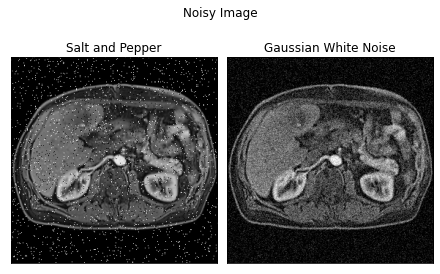

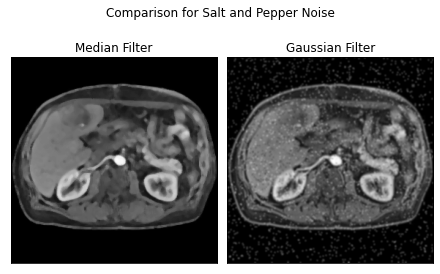


 Mean Squared Error of Median Filter for S & P Noise : 1649.2816455209536

 Mean Squared Error of Gaussian Filter for S & P Noise : 1268.8376470588237


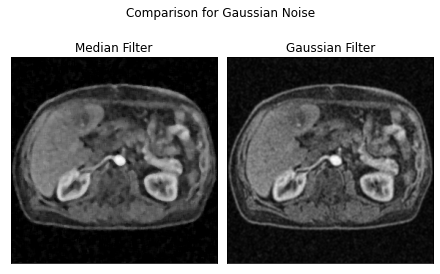


 Mean Squared Error of Median Filter for Gaussian Noise : 732.7857050937481

 Mean Squared Error of Gaussian Filter for Gaussian Noise : 521.8255104517857


In [51]:
"""
### Noisy Data ###
"""

# Generating the noise
im = skimage.io.imread(path, as_gray=True)
noisy_s_p=skimage.util.random_noise(im, mode='s&p', seed=None, clip=True)*255 # Salt and Pepper Noise
noisy_g=skimage.util.random_noise(im, mode='gaussian', seed=None, clip=True)*255 # Gaussian Noise

# Plot of two types of Noises

fig, axs = plt.subplots(1,2, constrained_layout=True)
plt.subplot(121),plt.imshow(noisy_s_p,cmap=plt.get_cmap('gray')),plt.title('Salt and Pepper')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(noisy_g,cmap=plt.get_cmap('gray')),plt.title('Gaussian White Noise')
plt.xticks([]), plt.yticks([])
fig.suptitle("Noisy Image")
plt.show()

# Comparison of two 5 x 5 filters with salt and pepper noise

median_s = cv2.medianBlur(noisy_s_p.astype('uint8'), 5)
gauss_s = cv2.GaussianBlur(noisy_s_p.astype('uint8'), (5,5), 0)

fig, axs = plt.subplots(1,2, constrained_layout=True)
plt.subplot(121),plt.imshow(median_s,cmap=plt.get_cmap('gray')),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gauss_s,cmap=plt.get_cmap('gray')),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
fig.suptitle("Comparison for Salt and Pepper Noise")
plt.show()

#Calculation of Mean Squared error of normalised data
median_x= (median_s - noisy_s_p)/255
median_mse =np.sum( median_x.ravel()**2)

gauss_x = (gauss_s - noisy_s_p)/255
gauss_mse = np.sum(gauss_x.ravel()**2)

print(f"\n Mean Squared Error of Median Filter for S & P Noise : {(median_mse)}")
print(f"\n Mean Squared Error of Gaussian Filter for S & P Noise : {(gauss_mse)}")

# Comparison of two 5 x 5 filters with Gaussian Noise

median_g = cv2.medianBlur(noisy_g.astype('uint8'), 5)
gauss_g = cv2.GaussianBlur(noisy_g.astype('uint8'), (5,5), 0)

fig, axs = plt.subplots(1,2, constrained_layout=True)
plt.subplot(121),plt.imshow(median_g,cmap=plt.get_cmap('gray')),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gauss_g,cmap=plt.get_cmap('gray')),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
fig.suptitle("Comparison for Gaussian Noise")
plt.show()

# Calculation of Mean Squared error of normalised data
median_y= (median_g - noisy_g)/255
median_mse_g =np.sum( median_y.ravel()**2)

gauss_y = (gauss_g - noisy_g)/255
gauss_mse_g = np.sum(gauss_y.ravel()**2)

print(f"\n Mean Squared Error of Median Filter for Gaussian Noise : {(median_mse_g)}")
print(f"\n Mean Squared Error of Gaussian Filter for Gaussian Noise : {(gauss_mse_g)}")


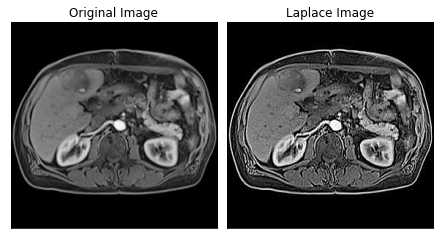

In [52]:
"""
### LoG ###
"""

# Function for plotting abs:
pic_num       = 1
kernel_size = 3
def show_abs(I, plot_title, pic_num):
    plt.figure(pic_num)
    plt.title(plot_title)
    plt.tight_layout()
    plt.axis('off')
    plt.imshow(abs(I), plt.cm.gray)
    return pic_num+1

# Reading of the image into numpy array:
A0           = image
# Map values to the (0, 255) range:
A0           = (A0 - np.amin(A0))*255.0 /(np.amax(A0)-np.amin(A0)) 

# Kernel for negative Laplacian:
kernel      = np.ones((kernel_size,kernel_size))*(-1)
kernel[1,1] = 8

# Convolution of the image with the kernel:
Lap        = scipy.ndimage.filters.convolve(A0, kernel)

#Map Laplacian to some new range:
ShF         = 200                  #Sharpening factor!
Laps        = Lap*ShF/np.amax(Lap) 

# Add negative Laplacian to the original image:
A           = A0 + Laps 
# Set negative values to 0, values over 255 to 255:
A = np.clip(A, 0, 255)



# converting back to uint8

fig, axs = plt.subplots(1,2, constrained_layout=True)
plt.subplot(121),plt.imshow(image,cmap = "gray"),plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(A,cmap="gray"),plt.title('Laplace Image')
plt.xticks([]), plt.yticks([])
plt.show()

# Extracting the row of interest and superimposing it with the original image
interest_row_l = A[190,:]
interest_row_l = interest_row_l[np.newaxis,:]


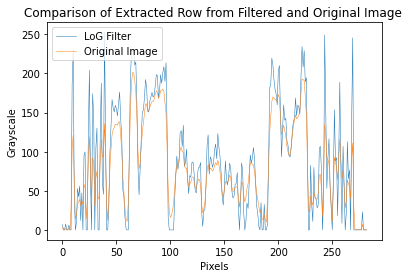

In [53]:
# # Visualization of superimposed row  with original Image
plt.figure()
plt.plot(interest_pix,interest_row_l[0,:],label="LoG Filter",linewidth=0.5)
plt.plot(interest_pix,interest_row[0,:],label="Original Image",linewidth=0.5)
plt.legend(loc="upper left")
plt.title("Comparison of Extracted Row from Filtered and Original Image ")
plt.xlabel("Pixels")
plt.ylabel("Grayscale")
plt.show()

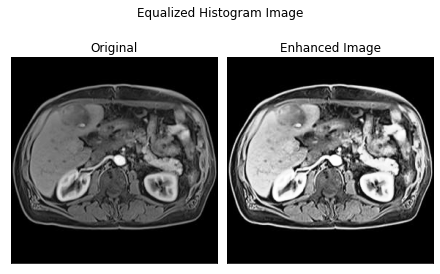

Plotting Equalized Histogram


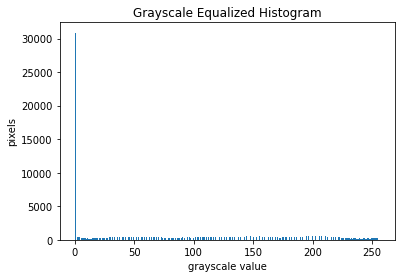

In [54]:
"""
### Histogram Equalization ###
"""

# Custom function for histogram equalization

def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# Function for generating histogram data
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

cs = cumsum(b)

# display the result

nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()
# re-normalize the cumsum
cs = nj / N
# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')
flat = image.astype('uint8')
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat.flatten()]
# put array back into original shape since we flattened it
img_new = np.reshape(img_new, image.shape)

# set up side-by-side image display
fig, axs = plt.subplots(1,2, constrained_layout=True)
plt.subplot(121),plt.imshow(image,cmap=plt.get_cmap('gray')),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_new,cmap=plt.get_cmap('gray')),plt.title('Enhanced Image')
plt.xticks([]), plt.yticks([])
fig.suptitle("Equalized Histogram Image")
plt.show()

# configure and draw the equalized histogram figure
print("Plotting Equalized Histogram")
plt.figure()
plt.title("Grayscale Equalized Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.hist(img_new.ravel(),256,[0,256])  
plt.show()

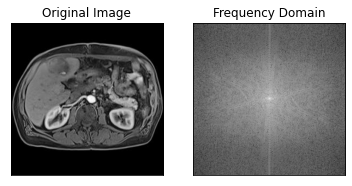


 Comparison of Original and Low Pass Filtered Image 



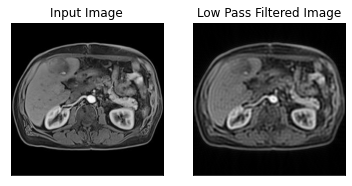


 Spatial and Frequency Domain of Low Pass Filtered Image 



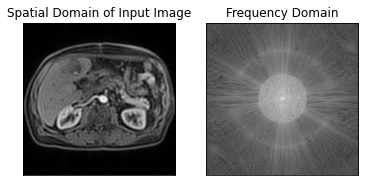


 Comparison of Original and High Pass Filtered Image 



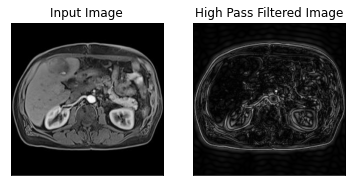


 Spatial and Frequency Domain of High Pass Filtered Image 



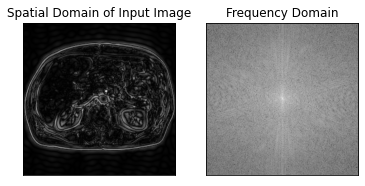

In [55]:
"""
Frequency Domain
"""
# Function for Low Pass Filter
def get_ideal_low_pass_filter(shape, cutoff):
        """Computes a Ideal low pass mask
        takes as input:
        shape: the shape of the mask to be generated
        cutoff: the cutoff frequency of the ideal filter
        returns a ideal low pass mask"""

        d0 = cutoff  # cutoff frequency
        rows, columns = shape
        mask = np.zeros((rows, columns), dtype=int)
        mid_R, mid_C = int(rows/2), int(columns/2)
        for i in range(rows):
            for j in range(columns):
                d = np.sqrt((i - mid_R)**2 + (j - mid_C)**2)
                if d <= d0:
                    mask[i, j] = 1
                else:
                    mask[i, j] = 0

        return mask

# Function for High Pass Filter
def get_ideal_high_pass_filter(shape, cutoff):
        """Computes a Ideal high pass mask
        takes as input:
        shape: the shape of the mask to be generated
        cutoff: the cutoff frequency of the ideal filter
        returns a ideal high pass mask"""

        # Hint: May be one can use the low pass filter function to get a high pass mask
        d0 = cutoff
        mask = 1 - get_ideal_low_pass_filter(shape, d0)
        
        return mask


img_float32 = np.float32(image)

# Discrete fourier transform to convert image to frequency domain
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
# Frequency magntidue calculation
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Frequency Domain'), plt.xticks([]), plt.yticks([])

plt.show()
## Low Pass Filter ##

# Calculating the cutoff frequency (i.e Max Frequency / 4)
# cutoff = np. max(abs(magnitude_spectrum)) / 4
cutoff = 45
cutoff = np.round (cutoff)

# Generating the mask 
mask = get_ideal_low_pass_filter(np.shape(image),cutoff)
mask=np.broadcast_to(mask[...,np.newaxis],(np.shape(image)[0],np.shape(image)[1],2))
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

# Comparison og Original and Low Pass Filtered Image
print("\n Comparison of Original and Low Pass Filtered Image \n")

plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Low Pass Filtered Image'), plt.xticks([]), plt.yticks([])

plt.show()          


# Plotting the low pass-filtered image spatial domain and the frequency domain

print("\n Spatial and Frequency Domain of Low Pass Filtered Image \n")
low_dft = cv2.dft(img_back, flags = cv2.DFT_COMPLEX_OUTPUT)
low_dft_shift = np.fft.fftshift(low_dft)

# Calculating the Frequency domain of image
magnitude_spectrum = 20*np.log(cv2.magnitude(low_dft_shift[:,:,0],low_dft_shift[:,:,1]))

# Visualising the Frequency Domain of Image
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Spatial Domain of Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Frequency Domain'), plt.xticks([]), plt.yticks([])
plt.show()   


### High Pass Filter ###

cutoff = 15
#cutoff = np. max(abs(magnitude_spectrum)) / 3
cutoff = np.round (cutoff)

mask = get_ideal_high_pass_filter(np.shape(image),cutoff)
mask=np.broadcast_to(mask[...,np.newaxis],(np.shape(image)[0],np.shape(image)[1],2))
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

# Comparison of Original and High Pass Filtered Image
print("\n Comparison of Original and High Pass Filtered Image \n")

plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('High Pass Filtered Image'), plt.xticks([]), plt.yticks([])

plt.show()          

# Plotting the high pass-filtered image spatial domain and the frequency domain

print("\n Spatial and Frequency Domain of High Pass Filtered Image \n")
high_dft = cv2.dft(img_back, flags = cv2.DFT_COMPLEX_OUTPUT)
high_dft_shift = np.fft.fftshift(high_dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(high_dft_shift[:,:,0],high_dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Spatial Domain of Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Frequency Domain'), plt.xticks([]), plt.yticks([])
plt.show()   

**Basic Image Segmentation**

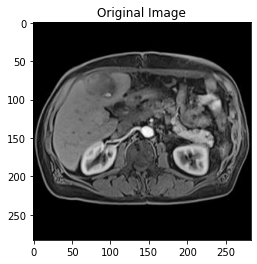

In [56]:
# Calling the Image from computer
path='liver.jpg'
image = skimage.io.imread(path, as_gray=False)
rgb_weights = [0.2989, 0.5870, 0.1140]
image = np.dot(image[...,:3], rgb_weights)

# Plotting the Original Image
plt.figure()
plt.title("Original Image")
plt.imshow(image,cmap="gray")
plt.show()

(Text(0.5, 1.0, 'Emperical Thresholding'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

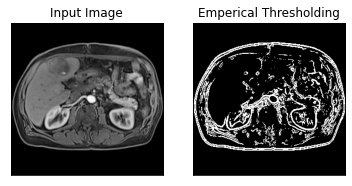

In [57]:
"""
Binary Image by Emperical thersholding on Gradient
"""

# Function for Emperical THresholding
def emperical_thresholding(image):
    # Calculating the gradient of the image
    gradient=np.gradient(image)
    gradient=cv2.magnitude(gradient[0][:,:], gradient[1][:,:])
    
    # Generating the mask of emperical thresholding
    mask = np.zeros(np.shape(image))
    mean = np.mean(gradient)
    for i in range(np.shape(image)[0]):
        for j in range(np.shape(image)[1]):
            
            if gradient[i,j] > mean*2.3:
                mask[i,j] = 1
            else:
                mask[i,j] = 0
                
    return mask
        
result = emperical_thresholding(image)  

# Comparison og Original Image and Emperically threshold image
plt.figure()
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(result, cmap = 'gray')
plt.title('Emperical Thresholding'), plt.xticks([]), plt.yticks([])


(Text(0.5, 1.0, 'Sobel Image Detection'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

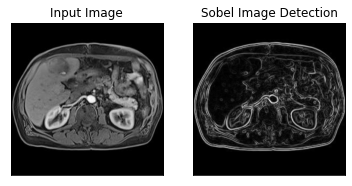

In [58]:
"""
Sobel Edge Detection Operator
"""

def sobel_edge_detection(img):
    
    # generating the copy of image
    container = np.copy(img)
    
    # generating the sobel gradient in x and y direction
    img_sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
    img_sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
    #Magnitude of x-gradient and y-gradient
    img_sobel = img_sobelx**2 + img_sobely**2
    container = (np.sqrt(img_sobel))
    return container

result1 = sobel_edge_detection(image)

# Comparison of Original Image and Sobel Edge Detection Image
plt.figure()
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(result1, cmap = 'gray')
plt.title('Sobel Image Detection'), plt.xticks([]), plt.yticks([])


(Text(0.5, 1.0, 'Prewitt Edge Detection'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

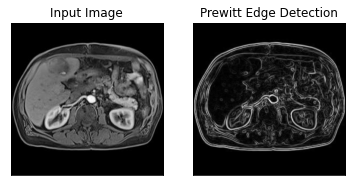

In [59]:
"""
Prewitt Edge Detection
"""
# Function for Prewitt Edge Detection
def prewitt_edge_detection(image):
    
    # Defining x and y direction kernel
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(image, -1, kernelx)
    img_prewitty = cv2.filter2D(image, -1, kernely)
    result = cv2.magnitude(img_prewittx,img_prewitty)
    return result

result2 = prewitt_edge_detection(image)

# Comparison of Input Image and Prewitt Edge Detection Image
plt.figure()
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(result2, cmap = 'gray')
plt.title('Prewitt Edge Detection'), plt.xticks([]), plt.yticks([])


(Text(0.5, 1.0, 'Canny Edge Detection'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

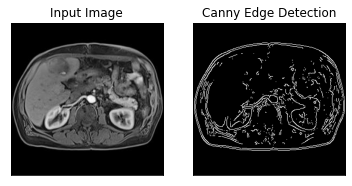

In [60]:
"""
Canny Operator
"""
# Function for Canny Edge Detection
def canny_edge_detection(image):
    # blurred = cv2.GaussianBlur(image, (5, 5), 0)
    result= cv2.Canny(image.astype('uint8'), 250, 250)
    return result


# show the original and blurred images
result3 = canny_edge_detection(image)

# comparison of original image and canny edge detection image
plt.figure()
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(result3, cmap = 'gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])


(Text(0.5, 1.0, 'Laplacian of Gaussian'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

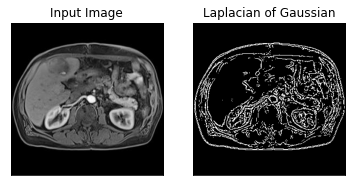

In [61]:

"""
Laplacian of Gaussian Edge Detection
"""

# function for Laplacian of Gaussian Edge Detection
def laplacian_of_gaussian (image):
    gaussian_filter = np.array([[1/16.,1/8.,1/16.],[1/8.,1/4.,1/8.],[1/16.,1/8.,1/16.]])
    mask = np.array([[0,0,1,0,0],[0,1,2,1,0],[1,2,-16,2,1],[0,1,2,1,0],[0,0,1,0,0]])
    
    
    result = cv2.filter2D(image, -1, gaussian_filter)
    # Get x-gradient in "sx"
    sx = nd.sobel(result,axis=0,mode='constant')
    # # Get y-gradient in "sy"
    sy = nd.sobel(result,axis=1,mode='constant')
    
    # Get square root of sum of squares
    G = pow((sx*sx + sy*sy),0.5)
    G = (G>80)*G
    
    #convolving the image with mask
    temp_img = cv2.filter2D(image, -1, mask)
    (M,N) = temp_img.shape
    #detect zero crossing by checking values across 8-neighbors on a 3x3 grid
    temp = np.zeros((M+2,N+2))
    temp[1:-1,1:-1] = temp_img
    img = np.zeros((M,N))
    for i in range(1,M+1):
        for j in range(1,N+1):
            if temp[i,j]<0:
                for x,y in (-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1):
                    if temp[i+x,j+y]>0:
                        img[i-1,j-1] = 1
    # Result Image
    cimg= np.logical_and(img,G)
    
    return cimg

result4 = laplacian_of_gaussian(image)

# Comparison of Original Image and LoG Edge Detection Image
plt.figure()
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(result4, cmap = 'gray')
plt.title('Laplacian of Gaussian'), plt.xticks([]), plt.yticks([])
    


 
 
 Noisy Data Image Segmentation 
 
 



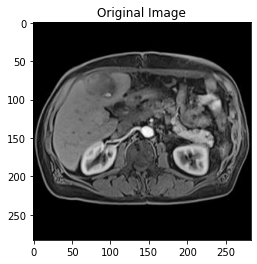

(Text(0.5, 1.0, 'Laplacian of Gaussian'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

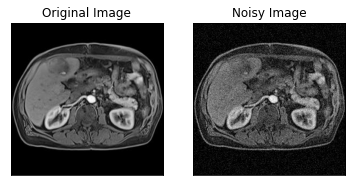

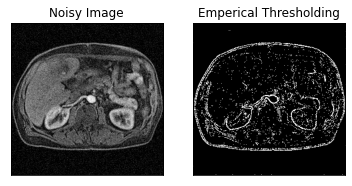

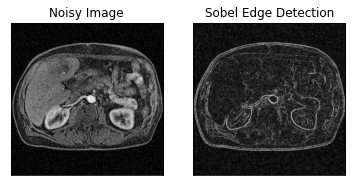

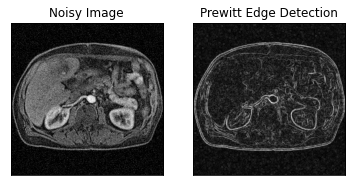

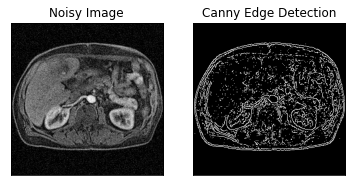

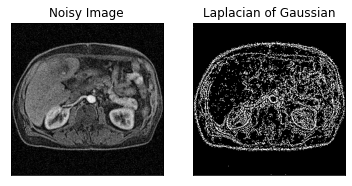

In [62]:
"""
Noisy Data Processing
"""

print("\n \n \n Noisy Data Image Segmentation \n \n \n")

# Generating the Gaussian Noise in the Image
row,col= image.shape
mean = 0  # Mean of Gaussian Distribution
var = 400  # Variance of Gaussian Distribution
sigma = var**0.5  # Standard Deviation
gauss = np.random.normal(mean,sigma,(row,col))
gauss = gauss.reshape(row,col)

# Noisy Image
noisy_g = image + gauss
noisy_g_clipped = np.clip(noisy_g, 0, 255)


### Original Image ###
plt.figure()
plt.title("Original Image")
plt.imshow(image,cmap="gray")
plt.show()

### Noisy Image ###
plt.figure()
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(noisy_g_clipped, cmap = 'gray')
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])

### Emperical Thresholding ###

result = emperical_thresholding(noisy_g_clipped)
plt.figure()
plt.subplot(121),plt.imshow(noisy_g_clipped, cmap = 'gray')
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(result, cmap = 'gray')
plt.title('Emperical Thresholding'), plt.xticks([]), plt.yticks([])

### Sobel Edge Detection  ###

result1 = sobel_edge_detection(noisy_g_clipped)
plt.figure()
plt.subplot(121),plt.imshow(noisy_g_clipped, cmap = 'gray')
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(result1, cmap = 'gray')
plt.title('Sobel Edge Detection'), plt.xticks([]), plt.yticks([])

### Prewitt Edge Detection ###

result2 = prewitt_edge_detection(noisy_g_clipped)
plt.figure()
plt.subplot(121),plt.imshow(noisy_g_clipped, cmap = 'gray')
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(result2, cmap = 'gray')
plt.title('Prewitt Edge Detection'), plt.xticks([]), plt.yticks([])

### Canny Edge Detection ###
result3 = canny_edge_detection(noisy_g_clipped.astype('uint8'))
plt.figure()
plt.subplot(121),plt.imshow(noisy_g_clipped, cmap = 'gray')
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(result3, cmap = 'gray')
plt.title('Canny Edge Detection'), plt.xticks([]), plt.yticks([])

### Laplacian of Gaussian  ###
result4 = laplacian_of_gaussian(noisy_g_clipped)
plt.figure()
plt.subplot(121),plt.imshow(noisy_g_clipped, cmap = 'gray')
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(result4, cmap = 'gray')
plt.title('Laplacian of Gaussian'), plt.xticks([]), plt.yticks([])
